Saving advertising.csv to advertising.csv
📄 Dataset preview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

📊 Model Evaluation:
MAE: 1.2748262109549338
MSE: 2.9077569102710896
R² Score: 0.9059011844150826

📈 Model Coefficients:
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337
Intercept: 4.714126402214127


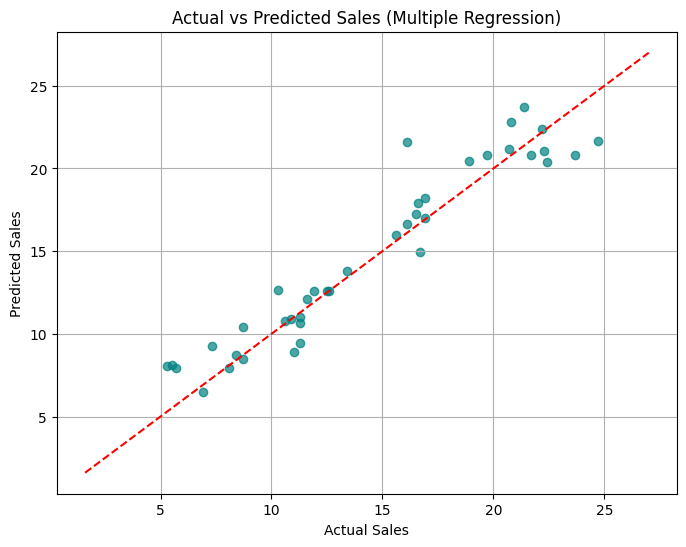

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Upload file (for Google Colab or Jupyter with upload support)
try:
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded:
        df = pd.read_csv(filename)
except ImportError:
    # For local Jupyter use (uncomment if needed)
    # import tkinter as tk
    # from tkinter import filedialog
    # root = tk.Tk()
    # root.withdraw()
    # file_path = filedialog.askopenfilename()
    # df = pd.read_csv(file_path)

    # Or simply use local file if placed in same directory
    df = pd.read_csv("Advertising.csv")

# Preview data
print("📄 Dataset preview:")
print(df.head())

# 1. Features and Target
X = df[['TV', 'Radio', 'Newspaper']]  # Multiple independent variables
y = df['Sales']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediction
y_pred = model.predict(X_test)

# 5. Evaluation
print("\n📊 Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 6. Coefficients
print("\n📈 Model Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print("Intercept:", model.intercept_)

# 7. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Multiple Regression)")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()
